In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
legoset = pd.read_csv('legoset.csv')

In [3]:
#getting all columns names
legoset.columns

Index(['ages', 'list_price', 'num_reviews', 'piece_count', 'play_star_rating',
       'prod_desc', 'prod_id', 'prod_long_desc', 'review_difficulty',
       'set_name', 'star_rating', 'theme_name', 'val_star_rating', 'country',
       'min_age', 'max_age', 'avg_age', 'price_per_piece'],
      dtype='object')

In [4]:
#removing columns which will not be used for price prediction:
df = legoset.drop(columns=['prod_id','ages','num_reviews', 'play_star_rating','prod_desc', 'prod_long_desc', 'review_difficulty', 'set_name', 'star_rating', 'val_star_rating','list_price'], axis=1)

In [5]:
df.head()

,piece_count,theme_name,country,min_age,max_age,avg_age,price_per_piece
0,277.0,Angry Birds™,US,6.0,12.0,9.0,0.108267
1,168.0,Angry Birds™,US,6.0,12.0,9.0,0.118988
2,74.0,Angry Birds™,US,6.0,12.0,9.0,0.175541
3,1032.0,Architecture,US,12.0,99.0,55.5,0.096890
4,744.0,Architecture,US,12.0,99.0,55.5,0.107513


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   piece_count      9799 non-null   float64
 1   theme_name       9799 non-null   object 
 2   country          9799 non-null   object 
 3   min_age          9799 non-null   float64
 4   max_age          9799 non-null   float64
 5   avg_age          9799 non-null   float64
 6   price_per_piece  9799 non-null   float64
dtypes: float64(5), object(2)
memory usage: 536.0+ KB


# Only US Data

In [7]:
US_df = df[df.country=='US']

In [8]:
US_df

,piece_count,theme_name,country,min_age,max_age,avg_age,price_per_piece
0,277.0,Angry Birds™,US,6.0,12.0,9.0,0.108267
1,168.0,Angry Birds™,US,6.0,12.0,9.0,0.118988
2,74.0,Angry Birds™,US,6.0,12.0,9.0,0.175541
3,1032.0,Architecture,US,12.0,99.0,55.5,0.096890
4,744.0,Architecture,US,12.0,99.0,55.5,0.107513
...,...,...,...,...,...,...,...
666,48.0,THE LEGO® NINJAGO® MOVIE™,US,6.0,14.0,10.0,0.208125
667,109.0,THE LEGO® NINJAGO® MOVIE™,US,6.0,14.0,10.0,0.091651
668,102.0,BrickHeadz,US,10.0,99.0,54.5,0.097941
669,89.0,BrickHeadz,US,10.0,99.0,54.5,0.112247


In [9]:
US_df = US_df.drop('country', axis=1)

# Dummies for Categorical Data

In [10]:
data = pd.get_dummies(df, columns=['theme_name', 'country' ], drop_first=False)

In [11]:
data.corr()

,piece_count,min_age,max_age,avg_age,price_per_piece,theme_name_Angry Birds™,theme_name_Architecture,theme_name_BOOST,theme_name_BrickHeadz,theme_name_Carnotaurus Gyrosphere Escape,...,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US
piece_count,1.000000,0.680542,0.361124,0.395672,-0.139014,-0.010965,0.002969,0.014857,-0.127494,0.000962,...,0.000897,0.000508,0.006155,0.006155,-0.000347,0.006155,0.002250,0.008693,0.005994,-0.028051
min_age,0.680542,1.000000,0.597718,0.645321,-0.243208,-0.012408,0.234191,-0.006788,0.242657,-0.006030,...,0.001254,0.001465,0.001319,0.001319,-0.000571,0.001319,0.001231,0.004241,0.001397,-0.008775
max_age,0.361124,0.597718,1.000000,0.998153,-0.128528,-0.013376,0.275647,-0.023819,0.509042,-0.021159,...,-0.002270,-0.004631,0.001816,0.001816,-0.004078,0.001816,0.000760,0.006415,0.002085,0.001363
avg_age,0.395672,0.645321,0.998153,1.000000,-0.140899,-0.013686,0.280399,-0.023210,0.503433,-0.020619,...,-0.002068,-0.004302,0.001830,0.001830,-0.003929,0.001830,0.000817,0.006434,0.002093,0.000634
price_per_piece,-0.139014,-0.243208,-0.128528,-0.140899,1.000000,-0.004864,-0.034257,-0.000549,-0.070372,-0.003995,...,0.004005,0.001563,-0.002623,0.002568,0.005142,0.014680,0.008332,0.002761,0.003249,-0.023449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
country_NO,0.006155,0.001319,0.001816,0.001830,0.014680,-0.005341,0.002243,0.001739,-0.002531,0.004210,...,-0.047838,-0.047564,-0.046566,-0.046566,-0.047947,1.000000,-0.047122,-0.045608,-0.046510,-0.058507
country_NZ,0.002250,0.001231,0.000760,0.000817,0.008332,-0.005405,0.001494,0.001505,-0.003842,-0.008550,...,-0.048409,-0.048132,-0.047122,-0.047122,-0.048519,-0.047122,1.000000,-0.046153,-0.047066,-0.059206
country_PL,0.008693,0.004241,0.006415,0.006434,0.002761,-0.005231,0.003555,0.002151,-0.000236,0.004627,...,-0.046853,-0.046585,-0.045608,-0.045608,-0.046960,-0.045608,-0.046153,1.000000,-0.045553,-0.057303
country_PT,0.005994,0.001397,0.002085,0.002093,0.003249,-0.005335,0.002318,-0.009500,-0.002399,0.004234,...,-0.047780,-0.047506,-0.046510,-0.046510,-0.047889,-0.046510,-0.047066,-0.045553,1.000000,-0.058437


In [12]:
#from the data EDA we know that Lego Duplo, Lego City and Lego Power functions sets have different prices per piece. Removing those them from data:

data = data.drop(columns = ['theme_name_City', 'theme_name_DUPLO®', 'theme_name_Power Functions', 'theme_name_Technic'])

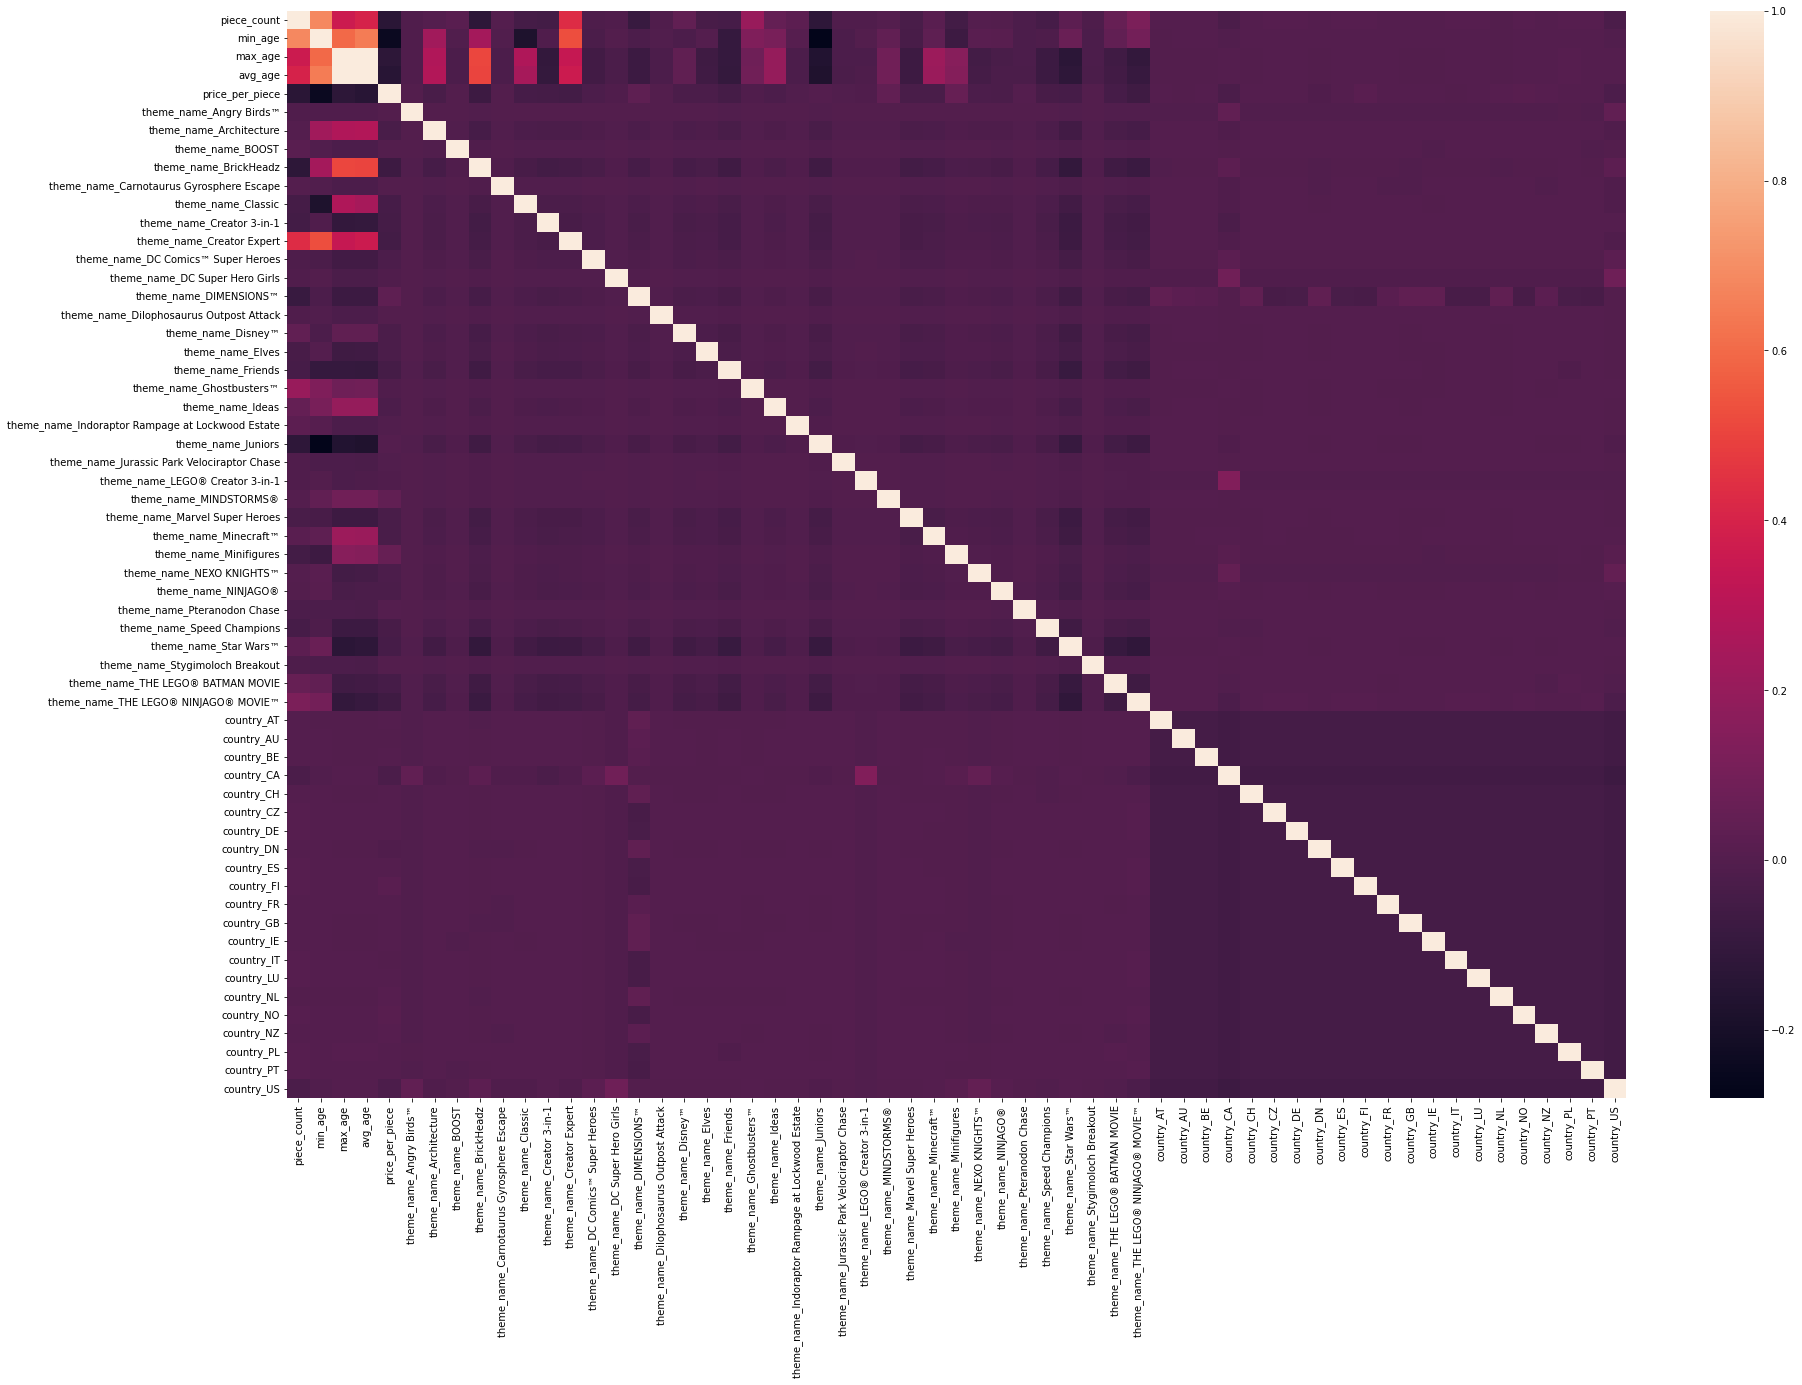

In [13]:
plt.figure(figsize=(30,20))
_ = sns.heatmap(data.corr())

In [14]:
data.columns.values

array(['piece_count', 'min_age', 'max_age', 'avg_age', 'price_per_piece',
       'theme_name_Angry Birds™', 'theme_name_Architecture',
       'theme_name_BOOST', 'theme_name_BrickHeadz',
       'theme_name_Carnotaurus Gyrosphere Escape', 'theme_name_Classic',
       'theme_name_Creator 3-in-1', 'theme_name_Creator Expert',
       'theme_name_DC Comics™ Super Heroes',
       'theme_name_DC Super Hero Girls', 'theme_name_DIMENSIONS™',
       'theme_name_Dilophosaurus Outpost Attack', 'theme_name_Disney™',
       'theme_name_Elves', 'theme_name_Friends',
       'theme_name_Ghostbusters™', 'theme_name_Ideas',
       'theme_name_Indoraptor Rampage at Lockwood Estate',
       'theme_name_Juniors',
       'theme_name_Jurassic Park Velociraptor Chase',
       'theme_name_LEGO® Creator 3-in-1', 'theme_name_MINDSTORMS®',
       'theme_name_Marvel Super Heroes', 'theme_name_Minecraft™',
       'theme_name_Minifigures', 'theme_name_NEXO KNIGHTS™',
       'theme_name_NINJAGO®', 'theme_name_Pteranod

In [15]:
US_data = pd.get_dummies(US_df, columns=['theme_name'], drop_first=False)

In [16]:
US_data.to_csv('US_data.csv', index=False)

In [17]:
US_data.corr()

,piece_count,min_age,max_age,avg_age,price_per_piece,theme_name_Angry Birds™,theme_name_Architecture,theme_name_BOOST,theme_name_BrickHeadz,theme_name_City,...,theme_name_NEXO KNIGHTS™,theme_name_NINJAGO®,theme_name_Power Functions,theme_name_Pteranodon Chase,theme_name_Speed Champions,theme_name_Star Wars™,theme_name_Stygimoloch Breakout,theme_name_THE LEGO® BATMAN MOVIE,theme_name_THE LEGO® NINJAGO® MOVIE™,theme_name_Technic
piece_count,1.000000,0.631458,0.284759,0.317092,-0.119824,-0.026092,0.017422,0.019516,-0.145622,-0.068764,...,-0.013439,-0.020566,-0.023399,-0.017452,-0.030294,0.028624,-0.012529,0.066715,0.143363,0.127770
min_age,0.631458,1.000000,0.595665,0.640512,-0.244977,-0.033544,0.212013,-0.005016,0.321707,-0.230253,...,0.032474,0.000374,0.023628,-0.019337,-0.011222,0.059913,-0.019337,0.051195,0.092481,0.158378
max_age,0.284759,0.595665,1.000000,0.998372,-0.109660,-0.036437,0.227767,-0.021006,0.606474,-0.179583,...,-0.085648,-0.071331,-0.016751,-0.021006,-0.071331,-0.140819,-0.021006,-0.052397,-0.089544,-0.091562
avg_age,0.317092,0.640512,0.998372,1.000000,-0.122239,-0.037219,0.232818,-0.020439,0.602678,-0.188045,...,-0.079580,-0.068171,-0.014337,-0.021456,-0.068994,-0.130378,-0.021456,-0.046460,-0.079043,-0.076293
price_per_piece,-0.119824,-0.244977,-0.109660,-0.122239,1.000000,-0.008538,-0.026519,-0.000294,-0.074771,0.151318,...,-0.027084,-0.029525,0.237795,-0.002856,-0.033674,-0.040993,-0.004852,-0.036655,-0.055778,-0.040648
theme_name_Angry Birds™,-0.026092,-0.033544,-0.036437,-0.037219,-0.008538,1.000000,-0.008243,-0.002589,-0.021948,-0.022134,...,-0.011746,-0.009783,-0.002589,-0.002589,-0.009783,-0.026545,-0.002589,-0.014243,-0.016420,-0.015721
theme_name_Architecture,0.017422,0.212013,0.227767,0.232818,-0.026519,-0.008243,1.000000,-0.004752,-0.040283,-0.040625,...,-0.021559,-0.017955,-0.004752,-0.004752,-0.017955,-0.048720,-0.004752,-0.026142,-0.030136,-0.028854
theme_name_BOOST,0.019516,-0.005016,-0.021006,-0.020439,-0.000294,-0.002589,-0.004752,1.000000,-0.012653,-0.012760,...,-0.006772,-0.005640,-0.001493,-0.001493,-0.005640,-0.015303,-0.001493,-0.008211,-0.009466,-0.009063
theme_name_BrickHeadz,-0.145622,0.321707,0.606474,0.602678,-0.074771,-0.021948,-0.040283,-0.012653,1.000000,-0.108172,...,-0.057404,-0.047808,-0.012653,-0.012653,-0.047808,-0.129726,-0.012653,-0.069607,-0.080244,-0.076829
theme_name_City,-0.068764,-0.230253,-0.179583,-0.188045,0.151318,-0.022134,-0.040625,-0.012760,-0.108172,1.000000,...,-0.057892,-0.048214,-0.012760,-0.012760,-0.048214,-0.130828,-0.012760,-0.070198,-0.080925,-0.077482


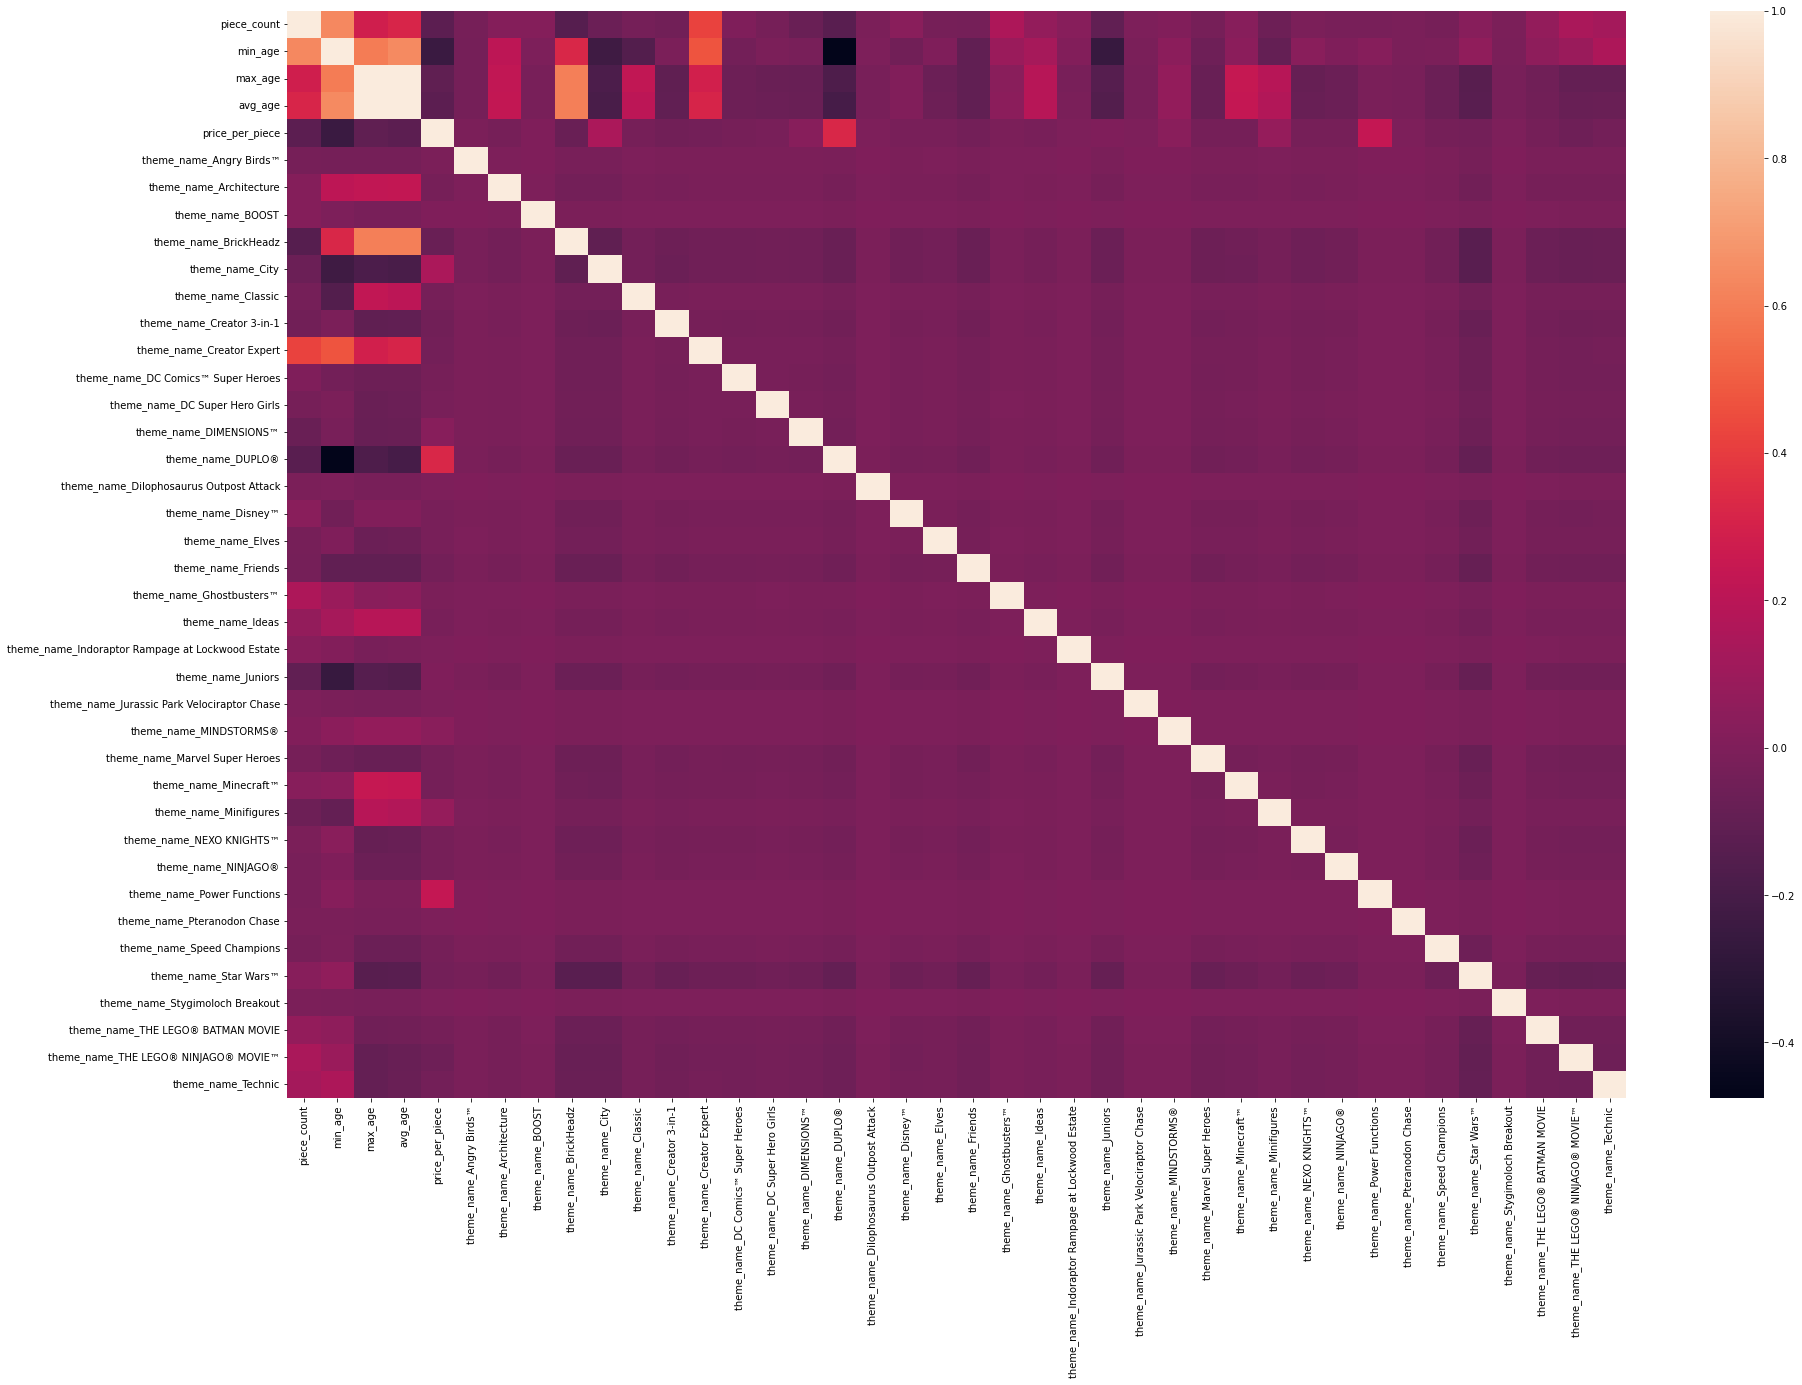

In [18]:
plt.figure(figsize=(30,20))
_ = sns.heatmap(US_data.corr())

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X= data.drop("price_per_piece", axis=1)

y = data['price_per_piece']

In [21]:
X

,piece_count,min_age,max_age,avg_age,theme_name_Angry Birds™,theme_name_Architecture,theme_name_BOOST,theme_name_BrickHeadz,theme_name_Carnotaurus Gyrosphere Escape,theme_name_Classic,...,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US
0,277.0,6.0,12.0,9.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,168.0,6.0,12.0,9.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,74.0,6.0,12.0,9.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1032.0,12.0,99.0,55.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,744.0,12.0,99.0,55.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,341.0,7.0,14.0,10.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9795,217.0,7.0,14.0,10.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9796,233.0,7.0,14.0,10.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9797,48.0,6.0,14.0,10.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
y

0       0.108267
1       0.118988
2       0.175541
3       0.096890
4       0.107513
          ...   
9794    0.107296
9795    0.112386
9796    0.104669
9797    0.253912
9798    0.111815
Name: price_per_piece, Length: 9799, dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [24]:
print(len(X_train))
print(len(X_test))

7839
1960


# Modelling

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [28]:
rf = RandomForestRegressor(n_estimators=200,max_depth=10)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict((X_test))

In [29]:
r2 = r2_score(y_test, y_pred_rf)
print(r2)

0.963269225869392


In [30]:
rf.feature_importances_

array([8.60563599e-01, 7.82413403e-02, 1.74323335e-02, 2.04465060e-02,
       5.77034046e-07, 0.00000000e+00, 2.34118415e-06, 6.72936009e-06,
       0.00000000e+00, 5.28088737e-06, 7.61924571e-05, 7.04043784e-06,
       0.00000000e+00, 0.00000000e+00, 2.78620350e-03, 3.56122103e-07,
       2.63788029e-06, 2.18964537e-07, 7.72440128e-07, 0.00000000e+00,
       1.48533174e-06, 0.00000000e+00, 1.74730869e-03, 0.00000000e+00,
       0.00000000e+00, 2.40442984e-03, 0.00000000e+00, 1.10452997e-05,
       5.30527582e-04, 1.39798255e-05, 9.23356780e-06, 5.55188785e-06,
       0.00000000e+00, 7.78031351e-04, 3.77234772e-07, 3.55076933e-05,
       6.27760771e-05, 2.66844445e-04, 6.77812033e-04, 4.35105836e-05,
       2.18749556e-03, 3.09749827e-04, 3.34491006e-04, 4.26453355e-04,
       8.75808069e-04, 4.15281582e-04, 1.75158775e-03, 3.63519358e-04,
       4.43203836e-04, 1.85056917e-04, 1.13247169e-03, 2.73349176e-04,
       2.97595033e-04, 8.92221661e-04, 2.10291513e-04, 5.83558186e-04,
      

<BarContainer object of 58 artists>

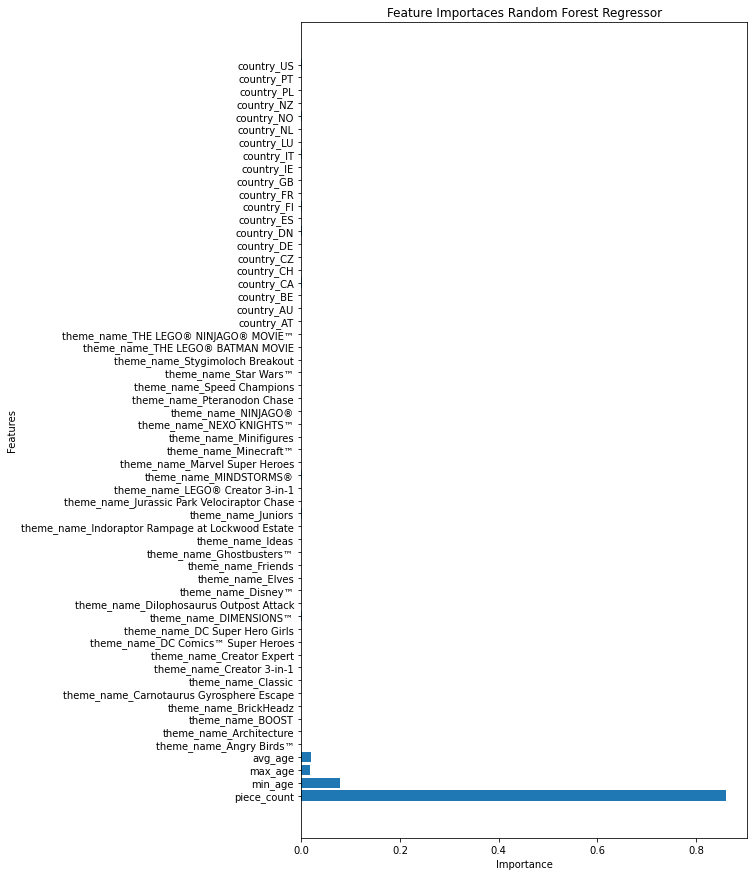

In [31]:
plt.figure(figsize=(8,15))
plt.title('Feature Importaces Random Forest Regressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.barh(X_train.columns, rf.feature_importances_)


Text(0.5, 1.0, 'Random Forest Regressor Tested vs Predicted Values')

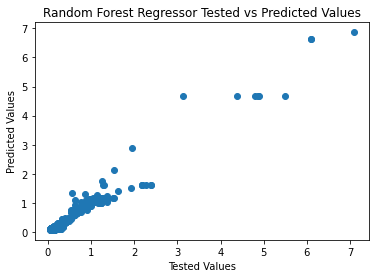

In [32]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Tested Values')
plt.ylabel('Predicted Values')
plt.title("Random Forest Regressor Tested vs Predicted Values")

/Users/baytech11/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normal Distribution Random Forest Regressor')

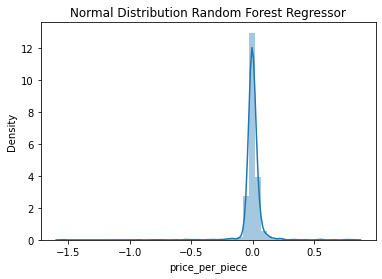

In [33]:
sns.distplot((y_test-y_pred_rf), bins=50);
plt.title('Normal Distribution Random Forest Regressor')

# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
#for the linear model it is beneficial to scale data, so the features would be in the similar range:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data)

In [37]:
scaled_df = pd.DataFrame(scaled_df, columns = ['piece_count','min_age', 'max_age', 'avg_age', 'price_per_piece','theme_name_Angry Birds™', 'theme_name_Architecture','theme_name_BOOST', 'theme_name_BrickHeadz',
       'theme_name_Carnotaurus Gyrosphere Escape', 'theme_name_Classic',
       'theme_name_Creator 3-in-1', 'theme_name_Creator Expert',
       'theme_name_DC Comics™ Super Heroes',
       'theme_name_DC Super Hero Girls', 'theme_name_DIMENSIONS™',
       'theme_name_Dilophosaurus Outpost Attack', 'theme_name_Disney™',
       'theme_name_Elves', 'theme_name_Friends',
       'theme_name_Ghostbusters™', 'theme_name_Ideas',
       'theme_name_Indoraptor Rampage at Lockwood Estate',
       'theme_name_Juniors',
       'theme_name_Jurassic Park Velociraptor Chase',
       'theme_name_LEGO® Creator 3-in-1', 'theme_name_MINDSTORMS®',
       'theme_name_Marvel Super Heroes', 'theme_name_Minecraft™',
       'theme_name_Minifigures', 'theme_name_NEXO KNIGHTS™',
       'theme_name_NINJAGO®', 'theme_name_Pteranodon Chase',
       'theme_name_Speed Champions', 'theme_name_Star Wars™',
       'theme_name_Stygimoloch Breakout',
       'theme_name_THE LEGO® BATMAN MOVIE',
       'theme_name_THE LEGO® NINJAGO® MOVIE™', 'country_AT', 'country_AU',
       'country_BE', 'country_CA', 'country_CH', 'country_CZ',
       'country_DE', 'country_DN', 'country_ES', 'country_FI',
       'country_FR', 'country_GB', 'country_IE', 'country_IT',
       'country_LU', 'country_NL', 'country_NO', 'country_NZ',
       'country_PL', 'country_PT', 'country_US'])

In [38]:
scaled_df.head()

,piece_count,min_age,max_age,avg_age,price_per_piece,theme_name_Angry Birds™,theme_name_Architecture,theme_name_BOOST,theme_name_BrickHeadz,theme_name_Carnotaurus Gyrosphere Escape,...,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US
0,-0.322637,-0.501300,-0.540399,-0.552912,-0.243220,40.400083,-0.147987,-0.044077,-0.27329,-0.039155,...,-0.221683,-0.220414,-0.215792,-0.215792,-0.222189,-0.215792,-0.218369,-0.211352,-0.215533,3.688303
1,-0.448792,-0.501300,-0.540399,-0.552912,-0.223238,40.400083,-0.147987,-0.044077,-0.27329,-0.039155,...,-0.221683,-0.220414,-0.215792,-0.215792,-0.222189,-0.215792,-0.218369,-0.211352,-0.215533,3.688303
2,-0.557587,-0.501300,-0.540399,-0.552912,-0.117837,40.400083,-0.147987,-0.044077,-0.27329,-0.039155,...,-0.221683,-0.220414,-0.215792,-0.215792,-0.222189,-0.215792,-0.218369,-0.211352,-0.215533,3.688303
3,0.551190,1.582513,1.862645,1.894759,-0.264425,-0.024752,6.757359,-0.044077,-0.27329,-0.039155,...,-0.221683,-0.220414,-0.215792,-0.215792,-0.222189,-0.215792,-0.218369,-0.211352,-0.215533,3.688303
4,0.217863,1.582513,1.862645,1.894759,-0.244625,-0.024752,6.757359,-0.044077,-0.27329,-0.039155,...,-0.221683,-0.220414,-0.215792,-0.215792,-0.222189,-0.215792,-0.218369,-0.211352,-0.215533,3.688303


In [39]:
X= scaled_df.drop("price_per_piece", axis=1)

y = scaled_df['price_per_piece']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)

In [41]:
linear = linear_model.LinearRegression()

In [42]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [43]:
#computing r^2
reg.score(X, y)

0.15123323401790423

In [44]:
reg.coef_

array([-3.50880946e-02, -1.56724006e+12, -1.97061016e+13,  2.06810723e+13,
       -5.35377128e-03, -7.45780685e-02, -1.78019663e-02, -2.09634586e-01,
       -2.50371084e-02, -2.20703125e-01, -1.36962891e-01, -2.34375000e-02,
       -8.88671875e-02, -3.07617188e-02, -4.34570312e-02, -2.74047852e-02,
       -1.24267578e-01, -8.11157227e-02, -1.69921875e-01, -5.85937500e-03,
       -7.71484375e-02, -1.84326172e-02, -1.75781250e-01, -3.07617188e-02,
       -3.02734375e-02,  1.46484375e-02, -1.31835938e-01, -1.33056641e-01,
       -4.49218750e-02, -6.51855469e-02, -8.39843750e-02, -2.56347656e-02,
       -1.08154297e-01, -1.82983398e-01, -2.85644531e-02, -1.24511719e-01,
       -1.53320312e-01, -8.57586714e+11, -8.53141472e+11, -8.51355469e+11,
       -1.02328815e+12, -8.54032773e+11, -8.35987333e+11, -8.35987333e+11,
       -8.55811988e+11, -8.35987333e+11, -8.35987333e+11, -8.48667904e+11,
       -8.56699911e+11, -8.52249039e+11, -8.35987333e+11, -8.35987333e+11,
       -8.58472402e+11, -

In [45]:
#the intercept (often labeled the constant) is the expected mean value of Y when all X=0
reg.intercept_

0.0019566595175335693

In [46]:
y_pred = reg.predict(X_test)

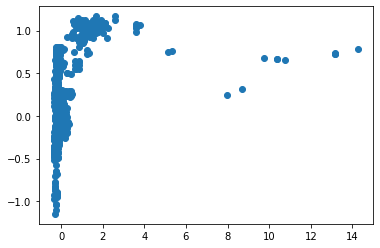

In [47]:
plt.scatter(y_test, y_pred)

# XGBoost

In [48]:
import re
import xgboost as xg

In [49]:
from xgboost import XGBRegressor

In [50]:
xgb_model = XGBRegressor()

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [51]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [52]:
xgb_model_predict = xgb_model.predict(X_test)

Text(0.5, 1.0, 'XGBoost Regressor: Tested versus Predicted Values')

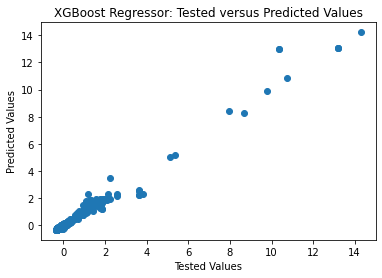

In [53]:
plt.scatter(y_test, xgb_model_predict)
plt.xlabel('Tested Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regressor: Tested versus Predicted Values')

/Users/baytech11/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


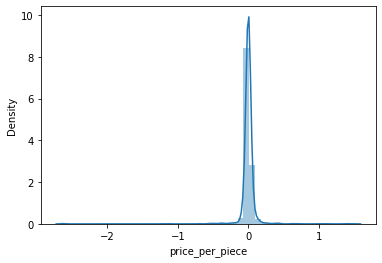

In [54]:
#plotting model to check normalization
sns.distplot((y_test-xgb_model_predict), bins=50);


# Model Evaluation

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn import model_selection

In [56]:
models=[]

models.append(('RF', RandomForestRegressor()))
models.append(('SVR', SVR()))
models.append(('XGB', XGBRegressor()))
models.append(('LR', LinearRegression()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('KN', KNeighborsRegressor()))



In [57]:
results_r2 = []
names = []

scoring = 'r2'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 30, shuffle = True)
    r2_cv = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results_r2.append(r2_cv)
    names.append(name)
    r2 = (name),'%s, %.3f, %.3f'% (r2_cv.mean(), r2_cv.var(), r2_cv.std())
    print(r2)

('RF', '0.9775386429999203, 0.000, 0.006')
('SVR', '0.12392410248007524, 0.003, 0.050')
('XGB', '0.980238031359098, 0.000, 0.008')
('LR', '0.14461630205157108, 0.000, 0.017')
('DT', '0.9716188544144405, 0.000, 0.009')
('KN', '0.35652584199313, 0.004, 0.066')


In [58]:
results_mse = []
names = []

scoring = 'neg_mean_squared_error'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 30, shuffle = True)
    mse_cv = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results_mse.append(mse_cv)
    names.append(name)
    mse = (name),'%s: %.3f, %.3f'% (mse_cv.mean(), mse_cv.var(), mse_cv.std())
    print(mse)

('RF', '-0.02416099791003727: 0.000, 0.013')
('SVR', '-0.9148882951054974: 0.087, 0.295')
('XGB', '-0.02120072059260477: 0.000, 0.014')
('LR', '-0.8813121661903519: 0.069, 0.262')
('DT', '-0.0295200471125337: 0.000, 0.015')
('KN', '-0.670683826916459: 0.045, 0.212')


/var/folders/2t/wr4klz0s55s9z9fkl4mpqwfr0000gn/T/ipykernel_93274/3127024402.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


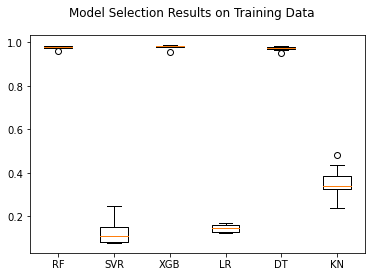

In [59]:
#Plotting Results

fig = plt.figure()
fig.suptitle("Model Selection Results on Training Data")
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results_r2)
plt.show()

/var/folders/2t/wr4klz0s55s9z9fkl4mpqwfr0000gn/T/ipykernel_93274/526562646.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names)


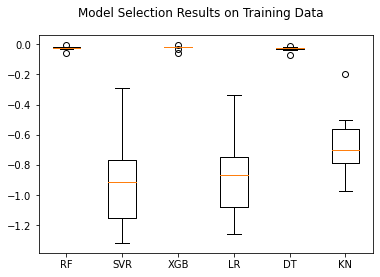

In [60]:
#Plotting Results

fig = plt.figure()
fig.suptitle("Model Selection Results on Training Data")
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(results_mse)
plt.show()